# Make Catologue

In [1]:
import os
from tqdm import tqdm
import pickle
import csv
import multiprocessing as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from imgprocesslib import homedir
from imgprocesslib.calibrationcpu import lim_mag

from astropy.stats import mad_std as mad
from astropy.coordinates import SkyCoord
import astropy.units as u

plt.rcParams['font.family'] = 'sans-serif'

import eazy

In [25]:
files = []
for file in sorted(os.listdir(os.path.join(homedir, "Output"))):
    if 'convolved_depths' in file and '0.1' in file and '5.83' in file and file.endswith('.pkl'):
        files.append(file)
        print(file)

convolved_depths_f090w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f115w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f150w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f182m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f200w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f210m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f277w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f335m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f356w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f410m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f430m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f435w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f444w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f460m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f480m_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f606w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_depths_f775w_apers_5.83_tol_0.1_detThresh_2.pkl
convolved_dept

In [26]:
skyflux_data = []
allfilename = []
for file in sorted(os.listdir(os.path.join(homedir, "Output"))):
    if 'convolved_depths' in file and '0.1' in file and '5.83' in file and file.endswith('.pkl'):
        with open(homedir+"Output/"+file, 'rb') as data:
            skyflux_data.append(pickle.load(data)['sky_flux'])
        
        allfilename.append(file.rsplit('_', 7)[1])

allfilename = allfilename
allfilename

['f090w',
 'f115w',
 'f150w',
 'f182m',
 'f200w',
 'f210m',
 'f277w',
 'f335m',
 'f356w',
 'f410m',
 'f430m',
 'f435w',
 'f444w',
 'f460m',
 'f480m',
 'f606w',
 'f775w',
 'f814w',
 'f850lp']

In [27]:
data_table = {
    'Filter': allfilename,
    'Sigma': [],
    'MAD Estimates': [],
    'Limiting Magnitudes': []
}

for i, skyflux in enumerate(skyflux_data):
    data_table['Sigma'].append(np.std(skyflux))
    data_table['MAD Estimates'].append(mad(skyflux))
    data_table['Limiting Magnitudes'].append(lim_mag(data_table['MAD Estimates'][i]))

data_table['Sigma'] = np.array(data_table['Sigma'])
data_table['MAD Estimates'] = np.array(data_table['MAD Estimates'])
data_table['Limiting Magnitudes'] = np.array(data_table['Limiting Magnitudes'])

In [28]:
data_table = pd.DataFrame(data_table)
styler = data_table.style
format_dict = {
    'Sigma': '{:0.3e}',
    'MAD Estimates': '{:0.3e}',
    'Limiting Magnitudes': '{:0}'
}
data_table_ = styler.format(format_dict)
data_table_

,Filter,Sigma,MAD Estimates,Limiting Magnitudes
0,f090w,9.250e-04,9.343e-04,29.726413126436572
1,f115w,7.511e-04,7.674e-04,29.940078964278033
2,f150w,7.831e-04,7.982e-04,29.897242286354338
3,f182m,1.586e-03,1.580e-03,29.15614360436721
4,f200w,7.513e-04,7.829e-04,29.918266615044043
5,f210m,2.402e-03,2.058e-03,28.86903809260147
6,f277w,5.499e-04,5.881e-04,30.228972852461943
7,f335m,9.961e-04,1.012e-03,29.639520769289177
8,f356w,6.274e-04,6.650e-04,30.095456708068454
9,f410m,9.676e-04,9.715e-04,29.68393648558355


Making the Catalogue

In [29]:
dataframe = pickle.load(open(os.path.join(homedir, "Output", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2.pkl"), 'rb'))
#dataframe = pd.read_csv(os.path.join(homedir, "Output", "Archive", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2.txt"), delim_whitespace=True)
#del dataframe['id']

In [30]:
dataframe

{'id': array([    0,     1,     2, ..., 36642, 36643, 36644]),
 'RA': array([53.1714874 , 53.17139849, 53.17174764, ..., 53.15731249,
        53.1571343 , 53.15710628]),
 'Dec': array([-27.84728918, -27.84723231, -27.84716785, ..., -27.72395359,
        -27.7239528 , -27.72393197]),
 'x-position': array([11832.72631508, 11842.15667088, 11805.10781026, ...,
        13332.57395067, 13351.50137464, 13354.47723462]),
 'y-position': array([ 2944.11848768,  2950.94577393,  2958.66636188, ...,
        17744.90823182, 17745.00822814, 17747.50874866]),
 'f090w': array([ 0.00280807,  0.0041875 ,  0.00482244, ..., -0.00048241,
         0.00224294,  0.00201399]),
 'f115w': array([ 0.00085796,  0.00220781,  0.00093959, ..., -0.00153253,
         0.00282898,  0.00207522]),
 'f150w': array([ 0.00019191,  0.00035975, -0.00096402, ..., -0.0013412 ,
         0.00248433,  0.00225939]),
 'f182m': array([0., 0., 0., ..., 0., 0., 0.]),
 'f200w': array([ 0.0003619 ,  0.00126852,  0.00028181, ..., -0.00017426

In [31]:
dataframe.isnull().any() # If dataframe is type pd.DataFrame

AttributeError: 'dict' object has no attribute 'isnull'

In [32]:
for filname, val in zip(allfilename, data_table['MAD Estimates']):
    dataframe[f'{filname}_err'] = np.ones(len(dataframe['id'])) * val

In [9]:
## Selection suggested by Ryan ##

# for col in dataframe.columns[23:]:
#     dataframe[col] = np.where(dataframe[col.rsplit('_', 1)[0]]/dataframe[col]>20, 0.05*dataframe[col.rsplit('_', 1)[0]].values, dataframe[col].values)

In [33]:
def trans_dict(data):
    for key, value in data.items():
        if isinstance(value, float) and np.isnan(value):
            data[key] = 'np.inf'
        elif isinstance(value, float) and np.isinf(value):
            data[key] = 'np.nan'
        elif value == 0.:
            data[key] = -99
    return data

In [34]:
## FOR DICT ##

# Make a 5 sigma cut
dataframe = {key: dataframe[key][dataframe['f356w'] > 5*dataframe['f356w_err'][0]] for key in dataframe.keys()}

# Any nan values covert to np.nan
# Rewite any 0.0 to -99.0
#dataframe = trans_dict(dataframe)

# # Drop flux and error columns for f182m, 210m, f430m, f460m, f480m
# columns = ['f182m', 'f182m_err', 'f210m', 'f210m_err', 'f430m', 'f430m_err', 'f460m', 'f460m_err', 'f480m', 'f480m_err']
# for col in columns:
#     del dataframe[col]

dataframe['id'] = np.arange(len(dataframe['id']))

for val_L in dataframe.values():
    val_L[val_L == 0.0] = -99.0

dataframe['id'][0] = 0

In [35]:
dataframe

{'id': array([    0,     1,     2, ..., 24833, 24834, 24835]),
 'RA': array([53.17174764, 53.17162795, 53.17181823, ..., 53.15796292,
        53.1571343 , 53.15710628]),
 'Dec': array([-27.84716785, -27.8471556 , -27.84711731, ..., -27.72466473,
        -27.7239528 , -27.72393197]),
 'x-position': array([11805.10781026, 11817.80650486, 11797.6158255 , ...,
        13263.50730218, 13351.50137464, 13354.47723462]),
 'y-position': array([ 2958.66636188,  2960.14167365,  2964.72913311, ...,
        17659.55152394, 17745.00822814, 17747.50874866]),
 'f090w': array([0.00482244, 0.00407245, 0.00168389, ..., 0.01150867, 0.00224294,
        0.00201399]),
 'f115w': array([9.39585149e-04, 5.45554343e-05, 1.78219394e-04, ...,
        1.14757222e-02, 2.82897831e-03, 2.07521891e-03]),
 'f150w': array([-0.00096402,  0.00074744, -0.00013608, ...,  0.01307921,
         0.00248433,  0.00225939]),
 'f182m': array([-99., -99., -99., ..., -99., -99., -99.]),
 'f200w': array([ 0.00028181,  0.00063472, -0.00

## FOR PANDAS ##

# Make a 5 sigma cut
dataframe = dataframe[(dataframe['f356w'] > 5*dataframe['f356w_err'][0])]

# Any nan values covert to np.nan
# Rewite any 0.0 to -99.0
dataframe = dataframe.fillna(value=-99.)
dataframe = dataframe.replace(0.0, -99.)

# Drop flux and error columns for f182m, 210m, f430m, f460m, f480m
columns = ['f182m', 'f182m_err', 'f210m', 'f210m_err', 'f430m', 'f430m_err', 'f460m', 'f460m_err', 'f480m', 'f480m_err']
dataframe = dataframe.drop(columns=columns)

dataframe['id'] = np.arange(len(dataframe['id']))
# Bring id to the front
cols = dataframe.columns.tolist()
dataframe = dataframe[cols[-1:] + cols[:-1]]

# check = check.fillna(value='np.nan')

In [36]:
# Write dictionary to csv
with open(os.path.join(homedir, "Output", "I_wonder.txt"), 'w') as f:
    for key in dataframe.keys():
        f.write("%s " % key)
    f.write("\n")
    for i in range(len(dataframe['id'])):
        for key in dataframe.keys():
            f.write("%s " % dataframe[key][i])
        f.write("\n")

In [10]:
# save dataframe
#dataframe.to_csv(os.path.join(homedir, "Output", "Archive", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors.txt"), sep=' ', index=False)
dataframe.to_csv(os.path.join(homedir, "Output", "Archive", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut.txt"), sep=' ', index=False)

In [38]:
def check_file_consistency(file_path):
    with open(file_path, 'r') as file:
        header_line = file.readline().strip().split()  # Read the header and split into column names
        num_columns = len(header_line)  # Get the number of columns
        dataframe['f356w'] > dataframe['f356w_err']
        header_line[0] = header_line[0][1:]
        print(header_line)

        for line_num, line in enumerate(file, start=2):
            fields = line.strip().split()  # Split the line into fields
            
            if len(fields) != num_columns:  # Check if the number of fields in the line matches the header
                print(f"Inconsistent number of columns at line {line_num}: {line} \nExpected: {num_columns} columns, Found: {len(fields)} columns")

                for i, (col, field) in enumerate(zip(header_line, fields), start=1):
                    print(f"{i}, {col}: {field}")

                return False
            
    print("File consistency check passed.")
    print("Place \'# \' in front of the first column name if it is header.")
    return True

# Provide the file path to check
#file_path = 'Output/photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_MODIFIED.txt'
file_path = 'Output/I_wonder.txt'

# Call the function to check the file consistency
check_file_consistency(file_path)

['', 'id', 'RA', 'Dec', 'x-position', 'y-position', 'f090w', 'f115w', 'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m', 'f430m', 'f435w', 'f444w', 'f460m', 'f480m', 'f606w', 'f775w', 'f814w', 'f850lp', 'f090w_err', 'f115w_err', 'f150w_err', 'f182m_err', 'f200w_err', 'f210m_err', 'f277w_err', 'f335m_err', 'f356w_err', 'f410m_err', 'f430m_err', 'f435w_err', 'f444w_err', 'f460m_err', 'f480m_err', 'f606w_err', 'f775w_err', 'f814w_err', 'f850lp_err']
Inconsistent number of columns at line 2: 0 53.17174764143286 -27.847167853374202 11805.107810255071 2958.666361878773 0.0048224359373512 0.0009395851489258432 -0.0009640152454545614 -99.0 0.0002818126854961766 -99.0 0.0027432871205905936 0.0028486572726023943 0.0034773200435301993 0.0070850994160809935 -99.0 -0.006808691358046417 0.003064222448579131 -99.0 -99.0 0.0012780196469770995 -3.90236086553839e-05 -0.0005104635505956878 -0.0005511891300920974 0.0009342535248772504 0.0007673586798884548 0.0007982392547349349 0.0015

False

### Make filter file

In [39]:
filters_list  = [{'Telescope': 'NIRCam Short Wavelength',
                  'filters': ['090w', '115w', '150w', '182m', '200w', '210m'],
                  'colours': ['#B7AAEE', '#AF47FF', '#5C55B3', '#99CCFF', '#00A8E0', '#0101DF']},
                 {'Telescope': 'NIRCam Long Wavelength',
                  'filters': ['277w', '335m', '356w', '410m', '430m', '444w', '460m', '480m'],
                  'colours': ['#256E37', '#B58653', '#A84900', '#0B412B', '#51C083', '#C8D96F', '#89931E', '#6DB41D']},
                 {'Telescope': 'HST ACS', 
                  'filters': ['435w', '606w', '775w', '814w', '850lp'],
                  'colours': ['#660000', '#DD0000', '#DB2E6B', 'orange', '#E0D100']},
                ]

In [40]:
jades_filters = []
for i in filters_list:
    for j in i['filters']:
        jades_filters.append(f"f{j}")

jades_filters

['f090w',
 'f115w',
 'f150w',
 'f182m',
 'f200w',
 'f210m',
 'f277w',
 'f335m',
 'f356w',
 'f410m',
 'f430m',
 'f444w',
 'f460m',
 'f480m',
 'f435w',
 'f606w',
 'f775w',
 'f814w',
 'f850lp']

In [17]:
with open(os.path.join(EAZY_DIR, 'eazy-photoz/filters/', filters)) as f:
    filter_names = f.read().splitlines()

for filter in filter_names:
    for i, j in enumerate(jades_filters):
        if j in filter:
            jades_filters.pop(i)
            print(filter)

NameError: name 'EAZY_DIR' is not defined

## Eazy Photometric Analysis

In [41]:
PHOTO_DIR = os.path.join(homedir, 'Photoz/')
PHOTO_DIR

'/storage/teaching/MPhysProject/s1967975/MPhys_Project/Photoz/'

##### Make grid file and save it while processing the filters

In [42]:
grid_file = os.path.join(PHOTO_DIR, 'Output', 'templates_grid_file.npy')

# with open(grid_file, 'rb') as file:
#     grid_file = pickle.load(file)

In [43]:
# dataframe = pd.read_csv(os.path.join(homedir, "Output", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_MODIFIED.txt"), delim_whitespace=True)
# # Make a 5 sigma cut
# dataframe = dataframe[(dataframe['f356w'] > 5*dataframe['f356w_err'][0])]

# # Any nan values covert to np.nan
# dataframe = dataframe.fillna(value=-99.)
# dataframe['id'] = np.arange(len(dataframe))

# # # Bring id to the front
# # cols = dataframe.columns.tolist()
# # dataframe = dataframe[cols[-1:] + cols[:-1]]

# dataframe.to_csv(os.path.join(homedir, "Output", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_MODIFIED.txt"), sep=' ', index=False)

In [44]:
filter_obj = eazy.photoz.PhotoZ(
    param_file = os.path.join(PHOTO_DIR, "jades_zphot.param"),
    translate_file = os.path.join(PHOTO_DIR, 'translate_jades.translate'),
    #zeropoint_file = os.path.join(PHOTO_DIR, '/zphot.zeropoint'),
    #tempfilt_data=np.load(grid_file),
    n_proc=4,
    #load_prior=False,
    #guess=False,
    #fast_reader=False
    )

with open(grid_file, 'wb+') as file:
   pickle.dump(filter_obj.tempfilt.tempfilt, file)

np.save(grid_file, filter_obj.tempfilt.tempfilt)

Read default param file: /storage/teaching/MPhysProject/s1967975/MPhys_Project/Photoz/jades_zphot.param
Read CATALOG_FILE: /storage/teaching/MPhysProject/s1967975/MPhys_Project/Output/I_wonder.txt
   >>> NOBJ = 24836
f090w f090w_err (363): jwst_nircam_f090w
f115w f115w_err (364): jwst_nircam_f115w
f150w f150w_err (365): jwst_nircam_f150w
f182m f182m_err (370): jwst_nircam_f182m
f200w f200w_err (366): jwst_nircam_f200w
f210m f210m_err (371): jwst_nircam_f210m
f277w f277w_err (375): jwst_nircam_f277w
f335m f335m_err (381): jwst_nircam_f335m
f356w f356w_err (376): jwst_nircam_f356w
f430m f430m_err (384): jwst_nircam_f430m
f435w f435w_err (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f444w f444w_err (377): jwst_nircam_f444w
f460m f460m_err (385): jwst_nircam_f460m
f480m f480m_err (361): jwst_niriss_f480m
f606w f606w_err (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f775w f775w_err (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f814w f814w_err (  6): hst/ACS_update_sep07/wfc_f814w_t77.dat
f8

100%|██████████| 9/9 [05:43<00:00, 38.12s/it] 


Template   0: eazy_v1.1_sed1.dat (NZ=1).
Template   1: eazy_v1.1_sed2.dat (NZ=1).
Template   2: eazy_v1.1_sed3.dat (NZ=1).
Template   3: eazy_v1.1_sed4.dat (NZ=1).
Template   4: eazy_v1.1_sed5.dat (NZ=1).
Template   5: eazy_v1.1_sed6.dat (NZ=1).
Template   6: eazy_v1.1_sed7.dat (NZ=1).
Template   7: c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat (NZ=1).
Template   8: erb2010_highEW.dat (NZ=1).
Process templates: 344.640 s


277it [00:03, 89.98it/s]


In [22]:
filter_obj.fit_catalog(filter_obj.idx, n_proc=4)

100%|██████████| 277/277 [39:00<00:00,  8.45s/it]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=9)
Fit 2340.7 s (n_proc=4, NOBJ=24836)


In [23]:
print(filter_obj.chi2_best, len(filter_obj.chi2_best))
print(filter_obj.zml, len(filter_obj.zml))

[-1. -1. -1. ... -1. -1. -1.] 24836
[-1. -1. -1. ... -1. -1. -1.] 24836


In [22]:
dataframe = pd.read_csv(os.path.join(homedir, "Output", "Archive", "photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut.txt"), delim_whitespace=True)
del dataframe['id']

dataframe["z_spec"] = filter_obj.zml
dataframe["chi2_best"] = filter_obj.chi2_best

# # 5 SIGMA CUT
# # Drop rows with f356w < f356w_err*5
# dataframe = dataframe[dataframe['f356w'] > dataframe['f356w_err']*5]

# calculate magnitudes
dataframe["mag_f335m"] = -2.5 * np.log10(dataframe["f335m"]) + 23.9
dataframe["mag_f356w"] = -2.5 * np.log10(dataframe["f356w"]) + 23.9
dataframe["mag_f410m"] = -2.5 * np.log10(dataframe["f410m"]) + 23.9
dataframe["mag_f444w"] = -2.5 * np.log10(dataframe["f444w"]) + 23.9


# Drop rows with mag_f356w < 29.6
dataframe = dataframe[dataframe['mag_f356w'] < 29.6]

# fill any nan values with 'NAN' and re-number id column
dataframe = dataframe.fillna(value='NAN')
dataframe['id'] = np.arange(0, len(dataframe))

#Put the id column at the beginning
cols = dataframe.columns.tolist()
cols = cols[-1:] + cols[:-1]
dataframe = dataframe[cols]

# Save dataframe as ascii file
dataframe.to_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ.txt'), sep=' ', index=False)

/home/s1967975/.conda/envs/astro-env/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s1967975/.conda/envs/astro-env/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s1967975/.conda/envs/astro-env/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s1967975/.conda/envs/astro-env/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s1967975/.conda/envs/astro-env/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs

In [1]:
# load data 
data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ.txt'), delim_whitespace=True)
data.columns

NameError: name 'pd' is not defined

In [234]:
# show all cols when printing
pd.set_option('display.max_columns', None)
data[:20]

,id,RA,Dec,x-position,y-position,f090w,f115w,f150w,f182m,f200w,f210m,f277w,f335m,f356w,f410m,f430m,f435w,f444w,f460m,f480m,f606w,f775w,f814w,f850lp,f090w_err,f115w_err,f150w_err,f182m_err,f200w_err,f210m_err,f277w_err,f335m_err,f356w_err,f410m_err,f430m_err,f435w_err,f444w_err,f460m_err,f480m_err,f606w_err,f775w_err,f814w_err,f850lp_err,z_spec,chi2_best,mag_f335m,mag_f356w,mag_f410m,mag_f444w
0,0,53.170847,-27.846690,11900.596423,3016.091202,0.034247,0.035360,0.035707,0.0,0.039747,0.0,0.040840,0.040047,0.041427,0.034351,0.0,0.017131,0.023689,0.0,0.0,0.013694,0.022889,0.023030,0.023217,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,27.39358595897295,27.356798,27.560165335345246,27.963638285705482
1,1,53.171597,-27.846238,11821.012876,3070.296079,0.018574,0.022875,0.022863,0.0,0.022598,0.0,0.020276,0.017460,0.017359,0.014364,0.0,0.016108,0.010245,0.0,0.0,0.008245,0.016958,0.016590,0.016280,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,28.294875548643557,28.301166,28.506787884953518,28.8737161310654
2,2,53.170415,-27.846126,11946.465761,3083.765373,0.002529,0.004552,0.004514,0.0,0.006606,0.0,0.004867,0.005913,0.006082,0.006540,0.0,0.000887,0.004048,0.0,0.0,0.001267,-0.001517,0.000263,0.000407,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,29.470558129387918,29.439950,29.361137149393684,29.882013644082168
3,3,53.168789,-27.845896,12119.017701,3111.370567,0.003378,0.003567,0.004869,0.0,0.004720,0.0,0.005317,0.004392,0.008009,0.002650,0.0,0.005919,0.002349,0.0,0.0,0.004623,0.007785,0.003251,0.003241,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,29.79338051483697,29.141046,30.342089018592105,30.472682429143852
4,4,53.168823,-27.845868,12115.399200,3114.803996,0.006550,0.006356,0.007468,0.0,0.009399,0.0,0.009168,0.009320,0.008029,0.008968,0.0,0.006263,0.004572,0.0,0.0,0.006081,0.009063,0.004296,0.011215,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,28.976450657856088,29.138347,29.018302215144704,29.749658262648637
5,5,53.168985,-27.845825,12098.191601,3119.926827,0.007345,0.009038,0.013918,0.0,0.022485,0.0,0.013210,0.013072,0.012139,0.010703,0.0,0.010124,0.011645,0.0,0.0,0.007603,0.004254,0.008384,0.013364,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,28.609183187575407,28.689522,28.826210094873005,28.734688100836046
6,6,53.170622,-27.845725,11924.460435,3131.878961,0.004149,0.003824,0.004659,0.0,0.007350,0.0,0.004675,0.006506,0.005581,0.003862,0.0,0.005243,0.003244,0.0,0.0,0.004898,0.001042,0.002995,0.006082,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,29.36672407106554,29.533156,29.932840115033425,30.122165991410707
7,7,53.172163,-27.845701,11760.931450,3134.645148,0.007089,0.007365,0.007497,0.0,0.011589,0.0,0.011371,0.011933,0.011776,0.010599,0.0,0.004632,0.008560,0.0,0.0,0.004108,0.005129,0.006231,0.001197,0.000934,0.000767,0.000798,0.00158,0.000783,0.002058,0.000588,0.001012,0.000665,0.000972,0.003017,0.002101,0.000806,0.004142,0.002603,0.001529,0.00252,0.001909,0.003567,-1.0,-1.0,28.70810538474501,28.722498,28.836829648307614,29.068817526401585
8,8,53.171059,-27.845683,11878.058737,3136.865544,0.004848,0.002886,0.005

In [188]:
# read in the zspec file (ascii format)
# header begins with #

data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ.txt'), delim_whitespace=True)
zspec_data = pd.read_csv(os.path.join(homedir, 'Output', 'blythe_jades_N1281_zspec.cat'), delim_whitespace=True)

/tmp/ipykernel_1971147/3787260123.py:4: DtypeWarning: Columns (45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(homedir, 'Output', 'photometric_convolved_catalogue_f356w_apers_5.83_tol_0.1_detThresh_2_withErrors_5_sigmaCut_withZ.txt'), delim_whitespace=True)


In [202]:
data.columns

Index(['id', 'RA', 'Dec', 'x-position', 'y-position', 'f090w', 'f115w',
       'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m',
       'f430m', 'f435w', 'f444w', 'f460m', 'f480m', 'f606w', 'f775w', 'f814w',
       'f850lp', 'f090w_err', 'f115w_err', 'f150w_err', 'f182m_err',
       'f200w_err', 'f210m_err', 'f277w_err', 'f335m_err', 'f356w_err',
       'f410m_err', 'f430m_err', 'f435w_err', 'f444w_err', 'f460m_err',
       'f480m_err', 'f606w_err', 'f775w_err', 'f814w_err', 'f850lp_err',
       'z_spec', 'chi2_best', 'mag_f335m', 'mag_f356w', 'mag_f410m',
       'mag_f444w'],
      dtype='object')

In [238]:
zs = np.array(data['z_spec'])


In [245]:
for i, val in enumerate(zs != -1):
    if val == True:
        print(i)

14196
15827


In [236]:
#remove any -1 values in zs
zs = zs[zs != -1]

In [237]:
zs

array([11.616195 ,  1.2936406])

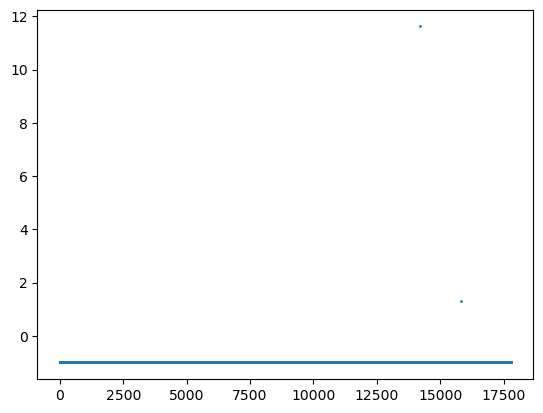

In [215]:
plt.scatter(data['id'], zs, s=1)

In [32]:
#zspec_data['id'] = np.arange(0, len(zspec_data))

# # put to the first column
# cols = zspec_data.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# zspec_data = zspec_data[cols]

# Save dataframe as ascii file
# zspec_data.to_csv(os.path.join(homedir, 'Output', 'blythe_jades_N1281_zspec.cat'), sep=' ')

In [ ]:
# read in 